<a href="https://colab.research.google.com/github/peterfarrell12/BTTS_Project/blob/master/PL_Preprocessing_%26_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install git+git://github.com/scikit-learn/scikit-learn.git

In [0]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


Using TensorFlow backend.


In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving pl_data.csv to pl_data.csv
User uploaded file "pl_data.csv" with length 110141 bytes


In [0]:
data = pd.read_csv('pl_data.csv')

# Data Exploration



In [0]:
data.dropna()

In [0]:
data.head()

In [0]:
data.sample(20)

In [0]:
data.describe()

,Gameweek,HT Position,AT Position,Result
count,1923.000000,1923.000000,1923.000000,1923.000000
mean,19.633905,10.265211,10.067603,1.074363
std,10.977611,5.953983,5.954179,0.730759
min,1.000000,0.000000,0.000000,0.000000
25%,10.000000,5.000000,5.000000,1.000000
50%,20.000000,10.000000,10.000000,1.000000
75%,29.000000,16.000000,15.000000,2.000000
max,38.000000,20.000000,20.000000,2.000000


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923 entries, 0 to 1922
Data columns (total 8 columns):
Season         1923 non-null object
Gameweek       1923 non-null int64
Gameday        1923 non-null object
Home Team      1923 non-null object
Away Team      1923 non-null object
HT Position    1923 non-null int64
AT Position    1923 non-null int64
Result         1923 non-null int64
dtypes: int64(4), object(4)
memory usage: 120.3+ KB


In [0]:
data["Gameday"].value_counts()

In [0]:
data["Home Team"].value_counts()

In [0]:
data["Away Team"].value_counts()

In [0]:
correl = data.corr()

In [0]:
print(correl['Result'].sort_values(ascending=False))

# Data Cleaning

In [0]:
def label_enc (col):
  le = preprocessing.LabelEncoder()
  x = le.fit_transform(col)

  return x

In [0]:
def clean(data):
  data = data.drop(['Season'], axis = 'columns')
  data = data[data['Gameweek'] != 1]
  data['Gameday'] = label_enc(data['Gameday'])
  data['Home Team'] = label_enc(data['Home Team'])
  data['Away Team'] = label_enc(data['Away Team'])

  return data

In [0]:
c_data = clean(data)

In [0]:
X = c_data.drop(['Result'], axis = 1)
y = c_data['Result']

In [0]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.astype(np.float64))

In [0]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
print(y)

[0 2 2 ... 0 2 0]


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 42,test_size=0.2)
print("train:" ,X_train.shape,"test:",X_test.shape)

train: (1378, 8) test: (345, 8)


In [0]:
#Naive Bayes Predictor

def NB_Classifier(X_train, y_train):
  clf = GaussianNB()
  clf.fit(X_train, y_train)
  train_accuracy = cross_val_score(clf, X_train, y_train, cv=10, scoring = "accuracy").mean()
  print('Train Accuracy: ' + str(train_accuracy))
  accuracy = accuracy_score(y_test,clf.predict(X_test))
  print("Test Accuracy: " + str(accuracy))


  

Test Accuracy: 0.6144927536231884


In [48]:
#Random Forest Classifier - Producting

def RFC_Classifier(X_train, y_train):
  rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes=16, n_jobs = -1)
  rnd_clf.fit(X_train, y_train)
  train_accuracy = cross_val_score(rnd_clf, X_train, y_train, cv=10, scoring = "accuracy").mean()
  print('Train Accuracy: ' + str(train_accuracy))
  test_accuracy = accuracy_score(y_test,rnd_clf.predict(X_test))
  print("Test Accuracy: " + str(test_accuracy))
  #for name,score in zip(X.columns, rnd_clf.feature_importances_):
  # print(name, score)




Train Accuracy: 0.647167840375204
Test Accuracy: 0.6202898550724638


In [0]:

#Random Forest Classifier
from sklearn.model_selection import cross_val_score, cross_val_predict
cross_val_score(rnd_clf, X_train, y_train, cv=10, scoring = "accuracy").mean()
print(classification_report(y_test,rnd_clf.predict(X_test)))


              precision    recall  f1-score   support

           0       0.64      0.72      0.68       116
           1       0.00      0.00      0.00        83
           2       0.61      0.89      0.72       146

    accuracy                           0.62       345
   macro avg       0.42      0.54      0.47       345
weighted avg       0.47      0.62      0.53       345



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
#Naive Bayes
from sklearn.model_selection import cross_val_score, cross_val_predict
cross_val_score(clf, X_train, y_train, cv=10, scoring = "accuracy").mean()
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.62      0.75      0.68       116
           1       0.39      0.08      0.14        83
           2       0.63      0.81      0.71       146

    accuracy                           0.61       345
   macro avg       0.55      0.55      0.51       345
weighted avg       0.57      0.61      0.56       345



0.6471939842150852

In [0]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [0]:
print(data1)

[[211   0 243]
 [ 92   0 251]
 [ 86   0 615]]


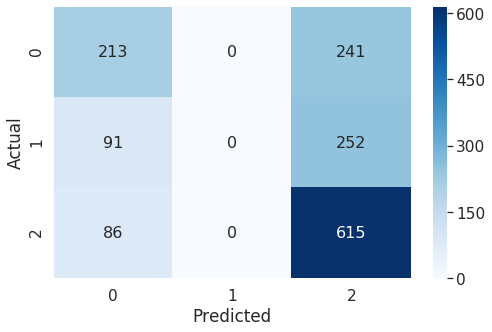

In [0]:
y_train_pred = cross_val_predict(rnd_clf, X_train, y_train, cv =3)
data1 = confusion_matrix(y_train, y_train_pred)
df_cm = pd.DataFrame(data1, columns=np.unique(y_train), index = np.unique(y_train))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='g',)# font size

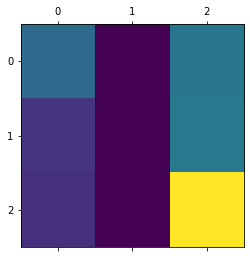

In [0]:
from sklearn.model_selection import cross_val_score, cross_val_predict
y_train_pred = cross_val_predict(rnd_clf, X_train_scaled, y_train, cv =3)
conf_mx = confusion_matrix(y_train, y_train_pred)
plt.matshow(conf_mx)
plt.show()

In [0]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rnd_clf.get_params())

In [0]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

In [0]:
rf_random = RandomizedSearchCV(estimator = rnd_clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_scaled, y_train)

In [0]:
rf_random.best_params_

In [0]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train_scaled, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


In [0]:
accuracy = accuracy_score(y_test,best_random.predict(X_test))
print("Test Accuracy: " + str(accuracy))

Test Accuracy: 0.448


In [0]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10,20,30,40]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rnd_clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [0]:
grid_search.fit(X_train_scaled, y_train)
grid_search.best_params_


In [0]:
grid_search.best_estimator_

In [0]:
gd = grid_search.best_estimator_
accuracy = accuracy_score(y_test,gd.predict(X_test))
print("Test Accuracy: " + str(accuracy))

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [0]:
models = [
    RandomForestClassifier(n_estimators=1000, max_depth=6, random_state=0),
    GradientBoostingClassifier(n_estimators=500),
    LinearSVC(random_state=0, tol=1e-5, multi_class='ovr'),
    LogisticRegressionCV(cv=5, random_state=0, multi_class='multinomial'),
    linear_model.SGDClassifier(max_iter=1000, tol=1e-3),
    SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None),
    MultinomialNB(),
    KNeighborsClassifier(n_neighbors=3)
]

In [0]:
model_results = pd.DataFrame(columns=['Model', 'Accuracy'])

In [0]:
for model in models:
  model_name = model.__class__.__name__
  clf = model
  clf.fit(X_train, y_train)
  accuracy = accuracy_score(y_test,clf.predict(X_test))
  print("Model: " + str(model_name))
  print("Test Accuracy: " + str(accuracy))
  print(classification_report(y_test,clf.predict(X_test)))
  model_results = model_results.append({'Model' : model_name , 'Accuracy' : accuracy} , ignore_index=True)

Model: RandomForestClassifier
Accuracy: 0.528
              precision    recall  f1-score   support

           0       0.51      0.48      0.50       114
           1       0.67      0.02      0.04        93
           2       0.53      0.84      0.65       168

    accuracy                           0.53       375
   macro avg       0.57      0.45      0.40       375
weighted avg       0.56      0.53      0.45       375

Model: GradientBoostingClassifier
Accuracy: 0.4533333333333333
              precision    recall  f1-score   support

           0       0.44      0.44      0.44       114
           1       0.22      0.14      0.17        93
           2       0.53      0.64      0.58       168

    accuracy                           0.45       375
   macro avg       0.40      0.41      0.40       375
weighted avg       0.43      0.45      0.43       375



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Model: LinearSVC
Accuracy: 0.44533333333333336
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       114
           1       0.15      0.04      0.07        93
           2       0.47      0.97      0.63       168

    accuracy                           0.45       375
   macro avg       0.21      0.34      0.23       375
weighted avg       0.25      0.45      0.30       375

Model: LogisticRegressionCV
Accuracy: 0.5253333333333333
              precision    recall  f1-score   support

           0       0.48      0.52      0.50       114
           1       0.00      0.00      0.00        93
           2       0.55      0.82      0.66       168

    accuracy                           0.53       375
   macro avg       0.34      0.45      0.38       375
weighted avg       0.39      0.53      0.45       375

Model: SGDClassifier
Accuracy: 0.48
              precision    recall  f1-score   support

           0       0.39      0.68      0.49

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
model_results = model_results.sort_values(by=['Accuracy'], ascending=False)
model_results.head(6)

,Model,Accuracy
0,RandomForestClassifier,0.528000
3,LogisticRegressionCV,0.525333
6,MultinomialNB,0.522667
4,SGDClassifier,0.480000
5,SGDClassifier,0.480000
1,GradientBoostingClassifier,0.453333


Neural Network - Keras / Tensorflow 


In [0]:
import numpy as np
np.set_printoptions(suppress=True)
xT = neural_network.predict(X_test, batch_size=32, verbose=0)

In [0]:
xT

array([[0.23972513, 0.23373894, 0.5265359 ],
       [0.04952907, 0.15464354, 0.7958274 ],
       [0.53055185, 0.18737876, 0.2820694 ],
       ...,
       [0.23972513, 0.23373894, 0.5265359 ],
       [0.23912126, 0.28846395, 0.47241473],
       [0.5785822 , 0.27269426, 0.14872351]], dtype=float32)

In [0]:
y1_test

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]])

In [0]:
tf.losses.log_loss(
    y1_test,
    xT,
    #weights=1.0,
    #epsilon=1e-07,
    #scope=None,
    #loss_collection=tf.GraphKeys.LOSSES,
    #reduction= Reduction.SUM_BY_NONZERO_WEIGHTS
)

<tf.Tensor 'log_loss_1/value:0' shape=() dtype=float32>

In [0]:
import numpy as np
predictions = np.array(xT)
targets = np.array(y1_test)
def cross_entropy(predictions, targets, epsilon=1e-10):
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce_loss = -np.sum(np.sum(targets * np.log(predictions + 1e-5)))/N
    return ce_loss
cross_entropy_loss = cross_entropy(predictions, targets)
print ("Cross entropy loss is: " + str(cross_entropy_loss))

Cross entropy loss is: 1.2952339645649773


In [0]:
from keras import losses
keras.losses.categorical_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0)

NameError: ignored

In [0]:
y_test[:10]

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])